# 6.3 Geographical visualizations with Python

Daniel Rodelli
__________________
#### Content Summary
1. Total cases and deaths by State
2. Cases, Deaths, and Mortality Rates in different year seasons
3. Mortality rate by Age Group
4. Analysis Considerations

In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
import os


In [3]:
#setting the data path
path = r'C:\Users\daniel\Documents\CareerFoundry\Immersion_achievement6'

In [4]:
#importing the dataset
df = pd.read_csv(os.path.join(path,'data', 'prepared_data','df_checked_flags.csv'))

In [5]:
df.head()

,Unnamed: 0,State,Age_group,Gender,Date,N_cases,N_deaths,N_recoveries,Male,Female,...,N_cases/100k,N_cases/1M,N_deaths/100k,N_recoveries/100k,climate_flag,density,cases/density,deaths/density,recoveries/density,density_flag
0,0,Baden-Württemberg,A00-A04,F,2020-03-02,1,0,1,5516636,5586407,...,0.009007,0.090065,0.0,0.009007,oceanic,308,0.003247,0.0,0.003247,mid_density
1,1,Baden-Württemberg,A00-A04,F,2020-03-13,3,0,3,5516636,5586407,...,0.027020,0.270196,0.0,0.027020,oceanic,308,0.009740,0.0,0.009740,mid_density
2,2,Baden-Württemberg,A00-A04,F,2020-03-14,4,0,4,5516636,5586407,...,0.036026,0.360262,0.0,0.036026,oceanic,308,0.012987,0.0,0.012987,mid_density
3,3,Baden-Württemberg,A00-A04,F,2020-03-15,1,0,1,5516636,5586407,...,0.009007,0.090065,0.0,0.009007,oceanic,308,0.003247,0.0,0.003247,mid_density
4,4,Baden-Württemberg,A00-A04,F,2020-03-16,3,0,3,5516636,5586407,...,0.027020,0.270196,0.0,0.027020,oceanic,308,0.009740,0.0,0.009740,mid_density


In [6]:
#importing the json file with the State boundary coordinates
geo= r'C:\Users\daniel\Documents\CareerFoundry\Immersion_achievement6\data\bundeslander.json'

In [7]:
geo

'C:\\Users\\daniel\\Documents\\CareerFoundry\\Immersion_achievement6\\data\\bundeslander.json'

### 1. Total cases and deaths by State

In [8]:
df_state=df.pivot_table(index=['State', 'climate_flag'], 
                        values=['N_cases', 'N_deaths', 'N_cases/100k', 'N_deaths/100k', 'cases/density', 'deaths/density'], 
                        aggfunc='sum')

In [9]:
df_state=df_state.reset_index()
df_state

,State,climate_flag,N_cases,N_cases/100k,N_deaths,N_deaths/100k,cases/density,deaths/density
0,Baden-Württemberg,oceanic,589494,5309.301243,10788,97.162553,1913.941558,35.025974
1,Bayern,continental,751509,5719.166925,15809,120.310349,4084.288043,85.918478
2,Berlin,continental,211619,5775.489017,3657,99.806555,52.187176,0.901850
3,Brandenburg,continental,118409,4678.217245,3868,152.820683,1409.630952,46.047619
4,Bremen,oceanic,34037,5004.484437,520,76.455972,20.958744,0.320197
5,Hamburg,oceanic,93609,5053.177420,1757,94.845931,38.617574,0.724835
6,Hessen,continental,339973,5402.267289,7786,123.721746,1148.557432,26.304054
7,Mecklenburg-Vorpommern,continental,50308,3123.219024,1209,75.057084,729.101449,17.521739
8,Niedersachsen,oceanic,306493,3829.524899,6009,75.080394,1835.287425,35.982036
9,Nordrhein-Westfalen,oceanic,975181,5440.167314,17973,100.264594,1857.487619,34.234286


In [10]:
location=[51.5, 10]

In [11]:
m = folium.Map(location=location, zoom_start=5.5)

folium.Choropleth(
    geo_data=geo,
    name="choropleth",
    data=df_state,
    columns=['State', 'N_cases/100k'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.6,
    line_opacity=0.8,
    legend_name="Comulative number of Cases every 100 thousand people",
).add_to(m)

folium.LayerControl().add_to(m)
m

In [12]:
m2 = folium.Map(location=location, zoom_start=5.5)

folium.Choropleth(
    geo_data=geo,
    name="choropleth",
    data=df_state,
    columns=['State', 'N_deaths/100k'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.6,
    line_opacity=0.8,
    legend_name="Comulative number of Deaths every 100 thousand people",
).add_to(m2)

folium.LayerControl().add_to(m2)
m2

The State of Saxony is the one with the highest numbers of both cases and deaths per capita.
In Task 6.2 I classified Saxony as a mid-density, continantal climate State. From previous analyses, these two characteristics are associated with higher number of cases and deaths.

### 2. Cases, Deaths, and Mortality Rates in different year seasons

There is a clear variation in cases and deaths between warm months and cold months. I will plot the number of cases and death per capita for both periods of the year. I am interested in seeing if there is a difference in which States have the highest numbers in these two periods.

I will first create a season column (Cold: from November to April, Warm: May to October)
Then I will split the dataframe in two, each containing the cumulative data relative to only one period.

In [13]:
season=[]
for i in df['month']:
    if (i <=4) or (i>=11):
        season.append('cold')
    else:
        season.append('warm')
df['season']=season

In [14]:
df.season.value_counts()

warm    53571
cold    49279
Name: season, dtype: int64

In [15]:
df_season=df.pivot_table(index=['State','season'], values=['N_cases/100k', 'N_deaths/100k'], aggfunc='sum')
df_season=df_season.reset_index()
df_season

,State,season,N_cases/100k,N_deaths/100k
0,Baden-Württemberg,cold,3559.132393,85.111802
1,Baden-Württemberg,warm,1750.168850,12.050750
2,Bayern,cold,4020.111440,108.331825
3,Bayern,warm,1699.055485,11.978524
4,Berlin,cold,3799.362897,90.445426
5,Berlin,warm,1976.126119,9.361129
6,Brandenburg,cold,3787.961697,144.444782
7,Brandenburg,warm,890.255548,8.375901
8,Bremen,cold,3041.918457,61.752900
9,Bremen,warm,1962.565980,14.703071


In [16]:
df_season['%deaths']=df_season['N_deaths/100k']/df_season['N_cases/100k']


In [17]:
df_season=df_season.sort_values('%deaths')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Berlin'),
  Text(1, 0, 'Rheinland-Pfalz'),
  Text(2, 0, 'Mecklenburg-Vorpommern'),
  Text(3, 0, 'Baden-Württemberg'),
  Text(4, 0, 'Hamburg'),
  Text(5, 0, 'Bayern'),
  Text(6, 0, 'Nordrhein-Westfalen'),
  Text(7, 0, 'Bremen'),
  Text(8, 0, 'Schleswig-Holstein'),
  Text(9, 0, 'Saarland'),
  Text(10, 0, 'Niedersachsen'),
  Text(11, 0, 'Hessen'),
  Text(12, 0, 'Brandenburg'),
  Text(13, 0, 'Sachsen-Anhalt'),
  Text(14, 0, 'Thüringen'),
  Text(15, 0, 'Sachsen')])

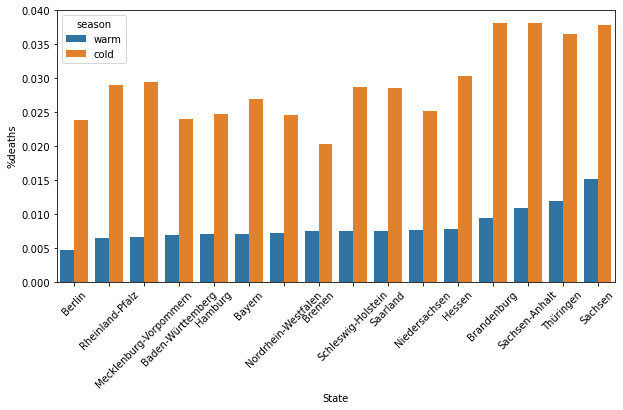

In [18]:
g=plt.figure(figsize=(10,5))
sns.barplot(data=df_season, x='State', y='%deaths', hue='season')
plt.xticks(rotation=45)

As expected, the difference in is remarkable.

In [19]:
df_cold=df_season[~df_season['season'].str.contains('warm')]
df_cold.drop(columns=['season'], inplace=True)
df_cold

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,State,N_cases/100k,N_deaths/100k,%deaths
8,Bremen,3041.918457,61.752900,0.020301
4,Berlin,3799.362897,90.445426,0.023805
0,Baden-Württemberg,3559.132393,85.111802,0.023914
18,Nordrhein-Westfalen,3512.329036,86.474238,0.024620
10,Hamburg,3360.309812,82.969946,0.024691
16,Niedersachsen,2627.701329,65.921810,0.025087
2,Bayern,4020.111440,108.331825,0.026947
22,Saarland,3360.396589,95.834210,0.028519
28,Schleswig-Holstein,1819.555975,52.080560,0.028623
20,Rheinland-Pfalz,3062.421326,88.937342,0.029042


In [20]:
df_warm=df_season[~df_season['season'].str.contains('cold')]
df_warm.drop(columns=['season'], inplace=True)
df_warm

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,State,N_cases/100k,N_deaths/100k,%deaths
5,Berlin,1976.126119,9.361129,0.004737
21,Rheinland-Pfalz,1444.835302,9.320731,0.006451
15,Mecklenburg-Vorpommern,735.671174,4.842393,0.006582
1,Baden-Württemberg,1750.168850,12.050750,0.006885
11,Hamburg,1692.867608,11.875984,0.007015
3,Bayern,1699.055485,11.978524,0.007050
19,Nordrhein-Westfalen,1927.838278,13.790356,0.007153
9,Bremen,1962.565980,14.703071,0.007492
29,Schleswig-Holstein,847.167948,6.355477,0.007502
23,Saarland,1543.103545,11.585472,0.007508


##### Relative number of Cases

In [21]:
m3 = folium.Map(location=location, zoom_start=5.5)

folium.Choropleth(
    geo_data=geo,
    name="choropleth",
    data=df_warm,
    columns=['State','N_cases/100k'],
    key_on ='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.6,
    line_opacity=0.8,
    legend_name="Comulative number of Cases every 100 thousand people in warm months",
).add_to(m3)

folium.LayerControl().add_to(m3)
m3

In [22]:
m4 = folium.Map(location=location, zoom_start=5.5)

folium.Choropleth(
    geo_data=geo,
    name="choropleth",
    data=df_cold,
    columns=['State','N_cases/100k'],
    key_on ='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.6,
    line_opacity=0.8,
    legend_name="Comulative number of Cases every 100 thousand people in cold months",
).add_to(m4)

folium.LayerControl().add_to(m4)
m4

During the warm months of the year, the States in Western and Souther Germany, and the City-States of Bremen, Hamburg, and Berlin have the highest relative numbers of cases, while Saxony (in Eastern Germany) has the higest relative numbers during the cold months.

##### Relative number of deaths

In [23]:
m5 = folium.Map(location=location, zoom_start=5.5)

folium.Choropleth(
    geo_data=geo,
    name="choropleth",
    data=df_warm,
    columns=['State','N_deaths/100k'],
    key_on ='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.6,
    line_opacity=0.8,
    legend_name="Cumulative number of Deaths in warm months",
).add_to(m5)

folium.LayerControl().add_to(m5)
m5

In [24]:
m6 = folium.Map(location=location, zoom_start=5.5)
folium.Choropleth(
    geo_data=geo,
    name="choropleth",
    data=df_cold,
    columns=['State','N_deaths/100k'],
    key_on ='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.6,
    line_opacity=0.8,
    legend_name="Cumulative numbers of Deaths in cold months"
).add_to(m6)

folium.LayerControl().add_to(m6)
m6

In [25]:
m7 = folium.Map(location=location, zoom_start=5.5)
folium.Choropleth(
    geo_data=geo,
    name="choropleth",
    data=df_warm,
    columns=['State','%deaths'],
    key_on ='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.6,
    line_opacity=0.8,
    legend_name="Mortality Rate in warm months"
).add_to(m7)

folium.LayerControl().add_to(m7)
m7

In [26]:
m8 = folium.Map(location=location, zoom_start=5.5)
folium.Choropleth(
    geo_data=geo,
    name="choropleth",
    data=df_cold,
    columns=['State','%deaths'],
    key_on ='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.6,
    line_opacity=0.8,
    legend_name="Mortality Rate in cold months"
).add_to(m8)

folium.LayerControl().add_to(m8)
m8

The mortality rate during cold and warm months is the highest in Saxony, reaching more than 3.5%.
During warm months, high mortality rate reaches a maximum of around 1.5%. During cold months, States in the Central-East have the highest mortality rate.

### 3. Mortality Rate by Age Group

In Task 6.2 I showed that there is a strong relationship between number of deaths and cases with age of the patiens. The ratio is particularly high for people aged 80 or more. I will plot a map of mortality rate considering only this age group.

In [27]:
df_age=df.pivot_table(index=['State', 'Age_group'], 
                      values=['N_cases', 'N_deaths', 'N_cases/100k', 'N_deaths/100k'], aggfunc='sum')
df_age=df_age.reset_index()
df_age

,State,Age_group,N_cases,N_cases/100k,N_deaths,N_deaths/100k
0,Baden-Württemberg,A00-A04,16094,144.951253,6,0.054039
1,Baden-Württemberg,A05-A14,50674,456.397404,0,0.000000
2,Baden-Württemberg,A15-A34,188165,1694.715584,28,0.252183
3,Baden-Württemberg,A35-A59,223836,2015.987869,527,4.746447
4,Baden-Württemberg,A60-A79,75484,679.849659,3108,27.992326
...,...,...,...,...,...,...
106,Thüringen,A15-A34,30378,1432.764356,8,0.377316
107,Thüringen,A35-A59,55271,2606.831217,162,7.640655
108,Thüringen,A60-A79,26678,1258.255563,1353,63.813621
109,Thüringen,A80+,13774,649.644356,2911,137.295972


In [28]:
df_80=df_age[df_age['Age_group']=='A80+']
df_80.drop(columns=['Age_group'], inplace=True) #there is no more need for this column
df_80['%deaths'] = df_80['N_deaths/100k']/df_80['N_cases/100k']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-28-6abe0297e98f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_80['%deaths'] = df_80['N_deaths/100k']/df_80['N_cases/100k']


In [29]:
df_80

,State,N_cases,N_cases/100k,N_deaths,N_deaths/100k,%deaths
5,Baden-Württemberg,35027,315.472074,7119,64.117558,0.203243
12,Bayern,49330,375.413341,10563,80.387008,0.214129
19,Berlin,12625,344.560502,2284,62.334747,0.180911
26,Brandenburg,12413,490.424804,2664,105.251887,0.214614
33,Bremen,1589,233.631806,292,42.932969,0.183763
40,Hamburg,5134,277.142293,1099,59.325941,0.214063
47,Hessen,22436,356.514396,5038,80.055247,0.224550
54,Mecklenburg-Vorpommern,4404,273.408933,767,47.616860,0.174160
61,Niedersachsen,19290,241.021933,3884,48.529248,0.201348
68,Nordrhein-Westfalen,56828,317.021997,10957,61.124974,0.192810


In [30]:
m9 = folium.Map(location=location, zoom_start=5.5)
folium.Choropleth(
    geo_data=geo,
    name="choropleth",
    data=df_80,
    columns=['State','%deaths'],
    key_on ='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.6,
    line_opacity=0.8,
    legend_name="Mortality Rate for people aged 80 or older"
).add_to(m9)

folium.LayerControl().add_to(m9)
m9

The State of Hessen has the highest mortality rate for people aged 80 or older, higher than 20%.


Just for the sake of the argument, I will check the mortality rate for all the other age groups.

In [31]:
df_youngers=df_age[df_age['Age_group'] != 'A80+']
df_youngers.drop(columns=['Age_group'], inplace=True)
df_youngers['%deaths'] = df_youngers['N_deaths/100k']/df_youngers['N_cases/100k']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-31-eb8558948124>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_youngers['%deaths'] = df_youngers['N_deaths/100k']/df_youngers['N_cases/100k']


In [32]:
df_youngers

,State,N_cases,N_cases/100k,N_deaths,N_deaths/100k,%deaths
0,Baden-Württemberg,16094,144.951253,6,0.054039,0.000373
1,Baden-Württemberg,50674,456.397404,0,0.000000,0.000000
2,Baden-Württemberg,188165,1694.715584,28,0.252183,0.000149
3,Baden-Württemberg,223836,2015.987869,527,4.746447,0.002354
4,Baden-Württemberg,75484,679.849659,3108,27.992326,0.041174
...,...,...,...,...,...,...
105,Thüringen,9766,460.608885,0,0.000000,0.000000
106,Thüringen,30378,1432.764356,8,0.377316,0.000263
107,Thüringen,55271,2606.831217,162,7.640655,0.002931
108,Thüringen,26678,1258.255563,1353,63.813621,0.050716


In [33]:
m10 = folium.Map(location=location, zoom_start=5.5)
folium.Choropleth(
    geo_data=geo,
    name="choropleth",
    data=df_youngers,
    columns=['State','%deaths'],
    key_on ='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.6,
    line_opacity=0.8,
    legend_name="Mortality Rate for people aged 79 or younger"
).add_to(m10)

folium.LayerControl().add_to(m10)
m10

Saxony comfirms itself as a State with a problematic situation. The deaths rate for people younger than 80 is by far the highest in Germany, around 0.5%.

### 4. Analysis Considerations
__Representing the information in the form of choropleth maps confirmed the previous results regarding State segmentation based on climate and Age groups.

__A few important considerations:__
   - Saxony is the State in the most delicate situation, with high numbers of cases and deaths, and high mortality rate all year around and for all age group.
   - Hessen has the highest mortality rate for people aged 80 or more, despite being part of the Oceanic climate Zone, which was shown previously to be more benign to contain the spread of the virus.
   - The relative number of cases during warm months is higher in States with an Oceanic climate (Western Germany)than in those with a Continental climate (Easter Germany), while the opposite is true during the winter months.
   
__Further questions to be answered:__
  - There have being so far 4 distinct waves of COVID-19 spread. It would be interesting to study an eventual correlation between the spikes in numbers and external factors, such as measures to contain the spread, the rise of new variants, vaccine availability, etc. Time-Series analysis would most possibly pick up the moment when these spikes begin and end, and the dates can be cross-checked with dates of other external factors.
    